##SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [3]:
hazel_df = pd.read_csv("/content/hazelnuts.txt",sep="\t",header=None)
hazel_df = hazel_df.transpose()
hazel_df.columns = ["sample_id","length","width","thickness","surface_area","mass","compactness","hardness","shell_top_radius","water_content","carbohydrate_content","variety"]
hazel_df.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175,c_avellana
1,72,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167,c_avellana
2,1,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174,c_americana
3,73,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167,c_avellana
4,2,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173,c_americana


In [5]:
all_features = hazel_df.drop(["variety","sample_id"],axis=1)
target_feature = hazel_df["variety"]
all_features.head()

,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content
0,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175
1,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167
2,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174
3,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167
4,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173


In [6]:
from sklearn import preprocessing
x = all_features.values.astype(float) #returns a numpy array of type float
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_features = pd.DataFrame(x_scaled)
scaled_features.head()

,0,1,2,3,4,5,6,7,8,9
0,0.150901,0.153243,0.324641,0.090652,0.142562,0.339383,0.773629,0.215165,0.000000,1.000000
1,0.274212,0.200285,0.151451,0.199245,0.268595,0.372051,0.324396,0.392418,0.003034,0.111111
2,0.649775,0.595153,0.695584,0.570349,0.630165,0.604356,0.165767,0.668636,0.016351,0.888889
3,0.289414,0.061297,0.110446,0.115203,0.214876,0.106171,0.537375,0.410143,0.017756,0.111111
4,0.386261,0.457591,0.464040,0.362606,0.411157,0.607985,0.417363,0.307730,0.032881,0.777778


The overall score for Decision Tree classifier is: 87.57


Text(0.5, 1.0, 'KNN Confusion_matrix')

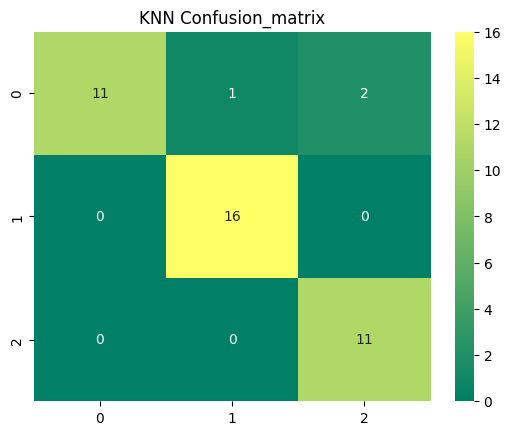

In [7]:
#Decision tree
X_train,X_test,y_train,y_test = train_test_split(scaled_features, target_feature, test_size=0.2, random_state=40)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

model= DecisionTreeClassifier(criterion='gini', min_samples_split=10, min_samples_leaf=1)
model.fit(X_train, y_train)
dt_pred=model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_tree=cross_val_score(model, scaled_features, target_feature,cv=10, scoring='accuracy')
print('The overall score for Decision Tree classifier is:', round(result_tree.mean()*100,2))

y_pred = cross_val_predict(model, scaled_features, target_feature, cv=10)
sns.heatmap(confusion_matrix(dt_pred,y_test),annot=True,cmap='summer')
plt.title('KNN Confusion_matrix')

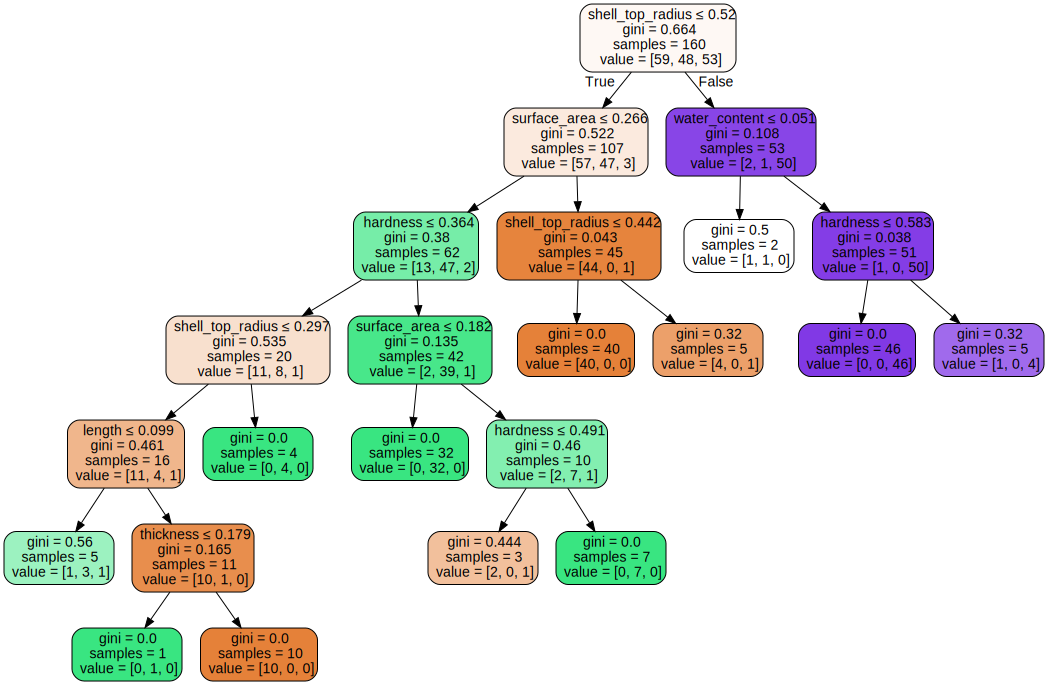

In [8]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=hazel_df.columns[1:-1],
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

The overall score for Support Vector machine classifier is: 92.05


Text(0.5, 1.0, 'SVM Confusion_matrix')

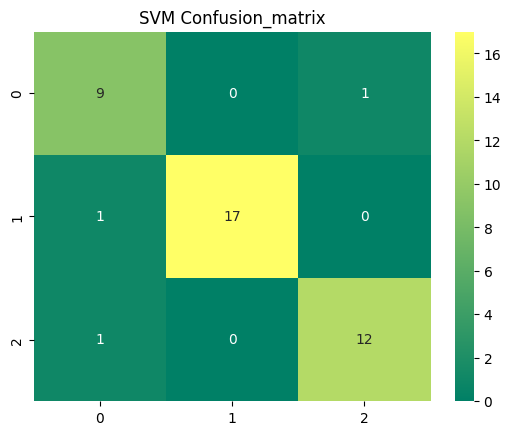

In [9]:
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)

pred_svm = model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_svm=cross_val_score(model, scaled_features, target_feature, cv=10, scoring='accuracy')
print('The overall score for Support Vector machine classifier is:',round(result_svm.mean()*100,2))

y_pred = cross_val_predict(model, scaled_features, target_feature,cv=10)
sns.heatmap(confusion_matrix(pred_svm,y_test),annot=True,cmap='summer')
plt.title('SVM Confusion_matrix')

Text(0, 0.5, 'Accuracy')

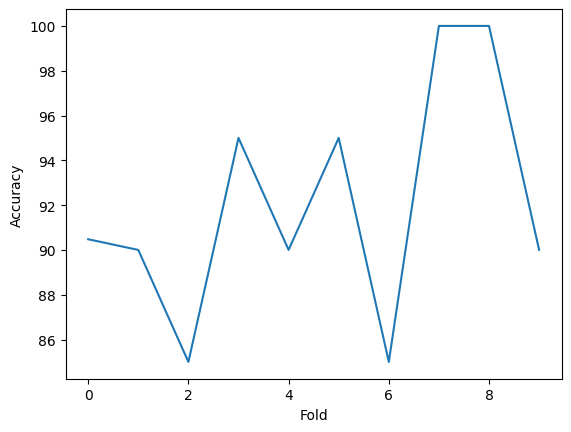

In [10]:
_result_svm=[r*100 for r in result_svm]
plt.plot(_result_svm)
plt.xlabel('Fold')
plt.ylabel('Accuracy')

The overall score for Support Vector machine classifier is: 57.67


Text(0.5, 1.0, 'SVM Confusion_matrix')

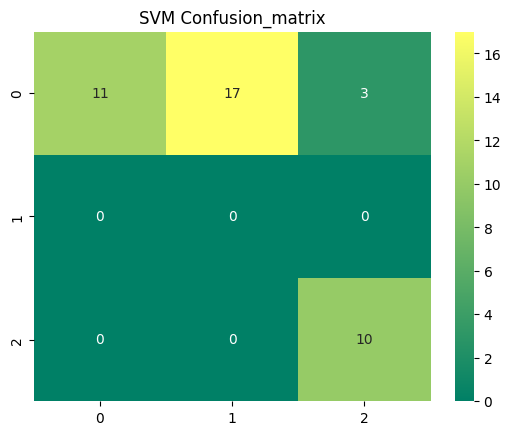

In [11]:
model = SVC(gamma='auto', kernel='poly')
model.fit(X_train,y_train)

pred_svm = model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_svmpoly=cross_val_score(model, scaled_features, target_feature, cv=10, scoring='accuracy')
print('The overall score for Support Vector machine classifier is:', round(result_svmpoly.mean()*100,2))

y_pred = cross_val_predict(model, scaled_features, target_feature, cv=10)
sns.heatmap(confusion_matrix(pred_svm,y_test), annot=True, cmap='summer')
plt.title('SVM Confusion_matrix')

Text(0, 0.5, 'Accuracy')

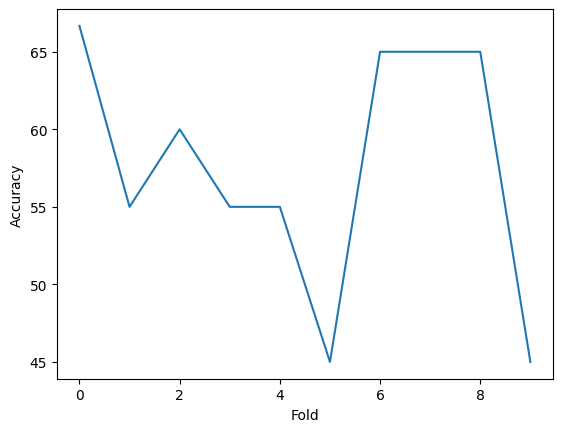

In [12]:
#SVM fold accuracy visualizer
_result_svm=[r*100 for r in result_svmpoly]
plt.plot(_result_svm)
plt.xlabel('Fold')
plt.ylabel('Accuracy')

The overall score for Support Vector machine classifier is: 89.55


Text(0.5, 1.0, 'SVM Confusion_matrix')

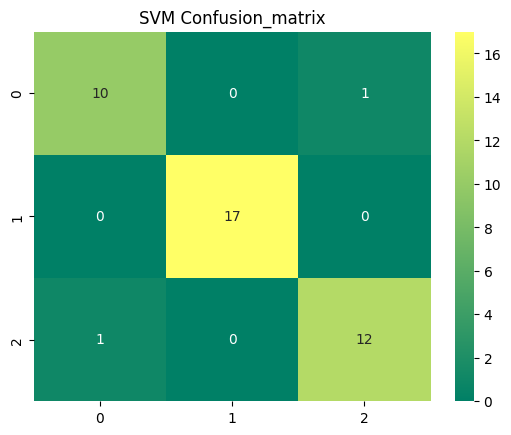

In [13]:
model = SVC(gamma='auto', kernel='rbf')
model.fit(X_train,y_train)

pred_svm = model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_svmrbf=cross_val_score(model, scaled_features, target_feature, cv=10, scoring='accuracy')
print('The overall score for Support Vector machine classifier is:', round(result_svmrbf.mean()*100,2))

y_pred = cross_val_predict(model, scaled_features, target_feature, cv=10)
sns.heatmap(confusion_matrix(pred_svm,y_test),annot=True,cmap='summer')
plt.title('SVM Confusion_matrix')

Text(0, 0.5, 'Accuracy')

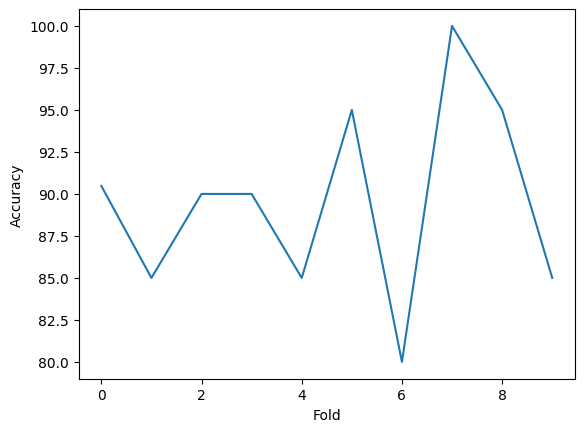

In [14]:
#SVM fold accuracy visualizer
_result_svm=[r*100 for r in result_svmrbf]
plt.plot(_result_svm)
plt.xlabel('Fold')
plt.ylabel('Accuracy')

In [16]:
#Comparing all classifiers
models = pd.DataFrame({
    'Model': ['SVM (Linear)', 'SVM (Poly)', 'SVM (RBF)','Decision Tree'],
    'Score': [result_svm.mean(), result_svmpoly.mean(), result_svmrbf.mean(),
              result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,SVM (Linear),0.920476
2,SVM (RBF),0.895476
3,Decision Tree,0.875714
1,SVM (Poly),0.576667


##Classify Hazelnuts

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
hazel_df = pd.read_csv("/content/hazelnuts.txt",sep="\t",header=None)
hazel_df = hazel_df.transpose()
hazel_df.columns = ["sample_id","length","width","thickness","surface_area",
                    "mass","compactness","hardness","shell_top_radius",
                    "water_content","carbohydrate_content","variety"]
hazel_df.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175,c_avellana
1,72,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167,c_avellana
2,1,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174,c_americana
3,73,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167,c_avellana
4,2,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173,c_americana


In [21]:
X = hazel_df.drop(["variety", "sample_id"], axis=1)
y = hazel_df["variety"]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [57]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.4656 - loss: 0.9998 - val_accuracy: 0.7188 - val_loss: 0.7961
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6250 - loss: 0.8918 - val_accuracy: 0.7812 - val_loss: 0.7184
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5844 - loss: 0.8446 - val_accuracy: 0.7812 - val_loss: 0.6649
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6542 - loss: 0.6795 - val_accuracy: 0.7500 - val_loss: 0.6269
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6969 - loss: 0.6262 - val_accuracy: 0.7500 - val_loss: 0.6058
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6802 - loss: 0.7316 - val_accuracy: 0.7812 - val_loss: 0.5905
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6854 - loss: 0.6911 - val_accuracy: 0.8438 - val_loss: 0.5749
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7781 - loss: 0.5745 - val_accuracy: 0.8438 - val_loss: